In [1]:
from pyopenms import *
import matplotlib.pyplot as plt

In [2]:
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("Fusion_180220_44.mzML", "Scerevisiae_UPS2_1802.fasta", protein_ids, peptide_ids)
exp = MSExperiment()
MzMLFile().load("Fusion_180220_44.mzML", exp)
filtered = MSExperiment()
for s in exp:
    if s.getMSLevel() == 2:
        filtered.addSpectrum(s)

In [3]:
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
            obs_int = [element / max(obs_int) for element in obs_int] 
            theo_int = [element * -1 for element in theo_int] 
            plt.figure(figsize=(12,8))
            plt.bar(obs_mz, obs_int, width = 3.0)
            plt.bar(theo_mz, theo_int, width = 3.0)
            plt.title(title)
            plt.ylabel('intensity')
            plt.xlabel('m/z')

Peptide ID m/z: 557.816467285156
 - Peptide hit rank: 1
 - Peptide hit sequence: ELNDLLIQR
Number of matched peaks: 10
ion	theo. m/z	observed m/z
y1+	1	175.118952913371	175.2742919921875
b2+	1	243.13393504097098	243.13525390625
b5++	2	293.14757410477097	293.32037353515625
y2+	1	303.1775311685711	303.33624267578125
b7++	2	406.231638455671	405.9684753417969
y3+	1	416.2615955194711	416.51153564453125
y7++	2	436.253436519471	435.82025146484375
b8++	2	470.260927583271	469.9417724609375
y4+	1	529.345659870371	529.1178588867188
b8+	1	939.5145786997709	939.9598999023438
Peptide ID m/z: 401.849090576172
 - Peptide hit rank: 1
 - Peptide hit sequence: FGYMYGSYSK
Number of matched peaks: 11
ion	theo. m/z	observed m/z
y1+	1	147.112804913371	147.26499938964844
b2+	1	205.09715484957098	204.70947265625
y2+	1	234.14483407287105	234.22544860839844
y4++	2	242.623734493121	242.94508361816406
b4++	2	250.10412281027095	249.79869079589844
b5++	2	331.63578745382097	331.3753356933594
b6++	2	360.146519501671	3

 - Peptide hit rank: 1
 - Peptide hit sequence: TDSDGDVVM(Oxidation)SDSK
Number of matched peaks: 11
ion	theo. m/z	observed m/z
b4++	2	210.07407481767098	210.1729736328125
b6++	2	296.098278945271	296.1877136230469
y6++	2	341.65744908142096	341.9916687011719
y7++	2	391.191656224971	391.36016845703125
b9++	2	468.684393240921	468.7835693359375
b10++	2	512.200407820671	512.371826171875
b12++	2	613.2298944801711	613.0510864257812
b7+	1	690.257695710871	690.500732421875
y8+	1	896.402980142671	896.3966064453125
b12+	1	1225.452512493571	1225.6712646484375
y12+	1	1270.5103617168713	1270.6129150390625
Peptide ID m/z: 732.810546875
 - Peptide hit rank: 1
 - Peptide hit sequence: NNDMDDLYHNGR
Number of matched peaks: 12
ion	theo. m/z	observed m/z
y4+	1	483.24225742377104	482.97705078125
y9++	2	560.745650432321	560.7279663085938
b5+	1	590.1875061856709	589.80224609375
b10++	2	616.735480432321	616.712158203125
y10++	2	618.259122512071	618.04931640625
b11++	2	645.2462124801709	645.118408203125
y5+	1	

y14++	2	798.3469898948711	798.3143920898438
y8+	1	959.436345174571	959.159423828125
b10+	1	1099.399687174571	1099.3402099609375
Peptide ID m/z: 422.94921875
 - Peptide hit rank: 1
 - Peptide hit sequence: AAQFMLYEETAEER
Number of matched peaks: 15
ion	theo. m/z	observed m/z
b3++	2	136.07367975387103	136.2240753173828
y2++	2	152.58441180172102	152.35107421875
y1+	1	175.118952913371	175.03062438964844
b4++	2	209.60788689742103	210.09124755859375
y3++	2	217.10570891337102	217.3741912841797
b5++	2	275.128129405971	275.1561279296875
y2+	1	304.161547136671	304.0968017578125
b6++	2	331.670161581421	331.1976623535156
y6++	2	367.669402716421	367.3026123046875
y7++	2	432.19069982807105	432.3214416503906
y4+	1	504.241255519471	504.5250244140625
b9++	2	542.2444204482711	542.2882080078125
b5+	1	549.248982345171	549.2435913085938
y5+	1	605.288934742771	605.7545776367188
b6+	1	662.333046696071	662.0516357421875
Peptide ID m/z: 672.303283691406
 - Peptide hit rank: 1
 - Peptide hit sequence: ELSFMEGEF

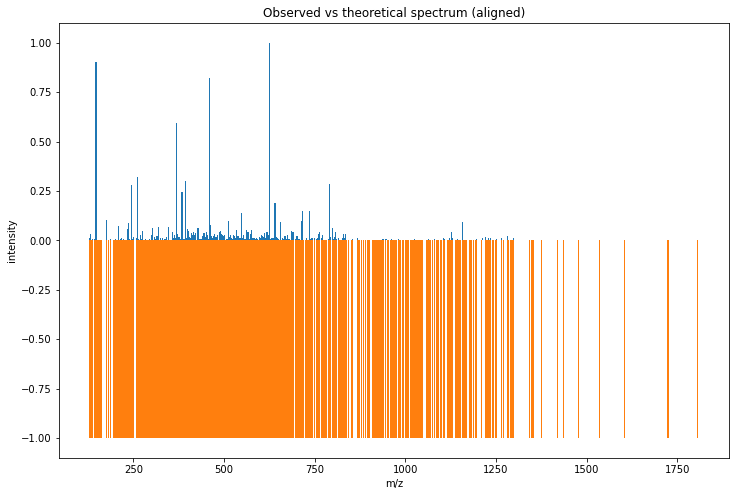

In [5]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for peptide_id in peptide_ids[0:100]:
    print (35*"=")
    print ("Peptide ID m/z:", peptide_id.getMZ()) 
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit sequence:", hit.getSequence())
        spectra = filtered.getSpectrum(peptide_id.getMetaValue("scan_index"))
        tsg = TheoreticalSpectrumGenerator()
        thspec = MSSpectrum()
        p = Param()
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        peptide = AASequence.fromString(hit.getSequence().toString())
        tsg.getSpectrum(thspec, peptide, 1, 2)
        
        alignment = []
        spa = SpectrumAlignment()
        p = spa.getParameters()
        
        p.setValue("tolerance", 0.5)
        p.setValue("is_relative_tolerance", "false")
        spa.setParameters(p)

        spa.getSpectrumAlignment(alignment, thspec, spectra)

        print("Number of matched peaks: " + str(len(alignment)))
        print("ion\ttheo. m/z\tobserved m/z")
        for theo_idx, obs_idx in alignment:
            ion_name = thspec.getStringDataArrays()[0][theo_idx].decode()
            ion_charge = thspec.getIntegerDataArrays()[0][theo_idx]
            print(ion_name + "\t" + str(ion_charge) + "\t"
                  + str(thspec[theo_idx].getMZ())
                  + "\t" + str(spectra[obs_idx].getMZ()))

        
        for theo_idx, obs_idx in alignment:
            theo_mz.append(thspec[theo_idx].getMZ())
            theo_int.append(thspec[theo_idx].getIntensity())
            obs_mz.append(spectra[obs_idx].getMZ())
            obs_int.append(spectra[obs_idx].getIntensity())
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)